## Project Checkpoint 1 — Dataset Selection + EDA

### Collaboration Declaration

#### Collaborators:

None


#### Web Sources:
- UCI Machine Learning Repository – Online Retail Dataset  
  https://archive.ics.uci.edu/ml/datasets/online+retail
- Stanford SNAP – Facebook Ego Network Dataset  
  https://snap.stanford.edu/data/ego-Facebook.html
- Yelp Open Dataset  
  https://www.yelp.com/dataset
- pandas documentation  
  https://pandas.pydata.org/docs/
- Matplotlib documentation  
  https://matplotlib.org/stable/contents.html


#### AI Tools:
- ChatGPT (GPT-5.2). I put the instructions of the assignment into ChatGPT and asked it to guide me through the process. I prompted it throughout the assignment to make sure I was completing each section correctly, to verify outputs, and to refine the wording of explanations and answers.


#### Papers / Citations:
- Chen, D., Sain, S. L., & Guo, K. (2012).  
  *Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining.*  
  Journal of Database Marketing and Customer Strategy Management, 19(3).


### Setup + Imports + Reprudicibility (random seeds, version)

In [2]:
import os
import re
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("pandas:", pd.__version__)
print("numpy:", np.__version__)


pandas: 2.2.2
numpy: 2.0.2


### (A) Candidate Datasets (3)

**Dataset Set 1: Online Retail Dataset, UCI Machine Learning Repository**  
https://archive.ics.uci.edu/ml/datasets/online+retail


- Dataset name and source: Online Retail Dataset, UCI Machine Learning Repository

- Course topic alignment: Frequent itemsets and association rule mining

- Potential beyond-course techniques: Sequential pattern mining, statistical correlation testing

- Dataset size and structure: 541,909 transactions from a UK-based online retailer

- Data types: Invoice ID, item description, quantity, unit price, timestamp, customer ID

- Target variable(s), if any: None (unsupervised pattern mining)

- Licensing or usage constraints: Open for academic and research use

**Data Set 2: Facebook Ego Network Dataset, Stanford SNAP**

https://snap.stanford.edu/data/ego-Facebook.html


- Dataset name and source: Facebook Ego Network Dataset, Stanford SNAP

- Course topic alignment: Graph mining, PageRank, community detection

- Potential beyond-course techniques: Node embeddings (node2vec), graph neural networks

- Dataset size and structure: ~4,000 nodes and ~88,000 edges

- Data types: Node IDs and edge lists

- Target variable(s), if any: None (unsupervised graph analysis)

- Licensing or usage constraints: Research use permitted

**Data Set 3: Dataset name and source: Yelp Open Dataset**

https://www.yelp.com/dataset

- Dataset name and source: Yelp Open Dataset

- Course topic alignment: Text mining, embeddings, clustering

- Potential beyond-course techniques: Topic modeling, transformer-based sentiment analysis

- Dataset size and structure: Millions of reviews in JSON format

- Data types: Review text, ratings, user IDs, business IDs, timestamps

- Target variable(s), if any: Star rating (optional supervised learning)

- Licensing or usage constraints: Open dataset for research and educational use

### (B) Comparison Table

| Dataset         | Supported Tasks | Data Quality Issues | Algorithmic Feasibility | Bias Considerations | Ethical Considerations |
|-----------------|-----------------|---------------------|--------------------------|---------------------|------------------------|
| Online Retail   | Frequent itemsets (course), sequential patterns (external) | Some transactions do not have associated customer IDs, canceled orders, noisy product descriptions | Apriori feasible after filtering; moderate size | Single retailer, UK-based customers | Purchasing behavior may reveal personal habits |
| Facebook Graph  | PageRank, community detection (course); node embeddings (external) | No node attributes, limited context | Small enough for in-memory processing | Limited demographic representation | Social links may reveal sensitive relationships |
| Yelp Reviews    | Text mining, clustering (course); topic modeling, transformers (external) | Noisy text, slang, possible fake reviews | Large dataset; may need sampling | Urban-heavy, platform-specific users | Impacts business reputation and reviewer privacy |


The three datasets represent different types of data: transactional records, social network graphs, and text reviews. The Online Retail dataset is structured and works well for association rule mining, while the Facebook dataset is better suited for graph based algorithms like PageRank and community detection. The Yelp dataset contains unstructured text, which makes it useful for more advanced natural language processing techniques.

In terms of feasibility, the retail and graph datasets are small enough to process easily on a single machine. The Yelp dataset, however, is much larger and may require sampling or additional preprocessing to keep the analysis manageable.

Each dataset also comes with its own potential biases and ethical concerns. For example, the retail data represents customers from a single retailer, the Facebook graph may not reflect all demographics, and Yelp reviews may be influenced by platform specific user behavior. These factors should be considered when interpreting any results.

### (C) Selected Dataset + Justification

**Selected Dataset: Online Retail Dataset**

**Reasons for selection:**

- Directly supports frequent itemset mining and association rules, which are core topics in the course.

- Contains real world transactional data with timestamps, allowing exploration of sequential or temporal patterns as a beyond-course technique.

- Structured tabular format makes it easy to clean, analyze, and visualize.

- Dataset size is moderate and feasible to process on a single machine without distributed computing.

- The dataset includes timestamps, which enables temporal analysis and allows comparison between unordered association rules and time aware sequential patterns.

**Trade Offs:**

- No text or graph components, limiting the range of techniques that can be applied.

- Primarily unsupervised data, with no clear target variable for supervised learning.

- Represents customers from a single retailer, which may introduce geographic and demographic bias.

- The dataset contains data cleaning challenges such as canceled invoices, negative quantities, and non associated customer IDs, which require preprocessing before analysis.

### (D) EDA on Selected Dataset

In [5]:
import os
import urllib.request

# Create data folder if it doesn't exist
os.makedirs("data", exist_ok=True)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
file_path = "data/online_retail.xlsx"

# Download only if file doesn't exist
if not os.path.exists(file_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_path)
    print("Download complete.")
else:
    print("Dataset already exists.")

file_path


Download complete.


'data/online_retail.xlsx'

**Dataset Download and Loading**

- To ensure the notebook is fully reproducible, the dataset is downloaded directly from the UCI Machine Learning Repository using a code cell. This avoids manual file handling and allows anyone running the notebook to automatically retrieve the data.

- The Online Retail dataset contains transactional records from a UK-based online retailer between December 2010 and December 2011. Each row represents a product purchased within an invoice, meaning a single transaction may span multiple rows.

- After downloading the dataset, it is loaded into a pandas DataFrame for inspection and exploratory analysis.

In [6]:
# Load file into a pandas dataframe
df = pd.read_excel("data/online_retail.xlsx")

# Print shape and some prelimenary data about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns)

print("\nData types:")
print(df.dtypes)


Dataset shape: (541909, 8)

Column names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], dtype='object')

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


**Dataset Overview**

- The dataset contains 541,909 rows and 8 columns, where each row represents a single product within a transaction. This means that a single invoice can appear across multiple rows if it contains multiple items.

- The dataset includes a mix of categorical, numeric, and datetime features. Key identifiers include InvoiceNo for transactions and CustomerID for individual customers. Product information is stored in StockCode and Description, while purchase behavior is captured through Quantity, UnitPrice, and InvoiceDate.

- The presence of both transactional identifiers and timestamps makes the dataset suitable for association rule mining and temporal pattern analysis.

#### Data basics

In [8]:
# Print the first 10 rows of the dataset
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


**Data Basics: Sample Transactions**

- The first few rows show that each entry represents a single product within a transaction. Multiple rows can share the same InvoiceNo, indicating that a single invoice may contain several different items.

- The dataset includes product descriptions, quantities purchased, prices, timestamps, and customer identifiers. Most of the initial transactions appear to come from customers in the United Kingdom, which aligns with the dataset’s description as a UK based retailer.

- This structure confirms that the dataset is suitable for transaction level analysis, where invoices can be treated as baskets of items for association rule mining.

In [9]:
# Summary statistics of dataset
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


**Data Basics: Summary Statistics**

- The summary statistics reveal several important characteristics of the dataset. The majority of transactions come from the United Kingdom, which dominates the country distribution. There are over 25,000 unique invoices and more than 4,000 unique products, indicating a diverse product catalog.

- The Quantity and UnitPrice columns show very wide ranges, including negative values. Negative quantities likely represent returned or canceled items, while extreme price values may indicate data entry errors or special transactions. These issues suggest that data cleaning will be necessary before performing association rule mining.

- Additionally, the count for CustomerID is lower than the total number of rows, indicating that some transactions do not have an associated customer identifier. These rows may need to be removed for analyses that rely on customer-level behavior.

In [10]:
# Check for Null Values
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


**Data Basics: Missing Values**

- The dataset contains missing values primarily in the CustomerID field, with over 135,000 rows lacking a customer identifier. A small number of rows also have missing product descriptions.

- The absence of CustomerID values limits the ability to analyze customer behavior or build sequential patterns over time. Since customer level analysis is important for this project, these rows will be removed during the data cleaning stage.

- The small number of missing descriptions is less critical, but these rows may also be removed to ensure consistency in product level analysis.

#### Cleaning decisions + why

In [11]:
# Create a working copy
df_clean = df.copy()

# Remove rows without CustomerID
df_clean = df_clean.dropna(subset=["CustomerID"])

print("Shape after removing missing CustomerID:", df_clean.shape)

Shape after removing missing CustomerID: (406829, 8)


**Cleaning Step 1: Removing Transactions Without CustomerID**

- Rows without a CustomerID were removed because they cannot be linked to a specific customer. Since the project aims to analyze purchasing behavior and potentially explore sequential patterns, a unique customer identifier is necessary.

- Keeping these rows would introduce noise and make it difficult to analyze repeat purchases or customer level patterns. After removing transactions without a CustomerID, the dataset size was reduced to 406,829 rows.

In [12]:
# Remove negative quantities (returns)
df_clean = df_clean[df_clean["Quantity"] > 0]

# Remove canceled invoices (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean["InvoiceNo"].astype(str).str.startswith("C")]

print("Shape after removing returns and cancellations:", df_clean.shape)


Shape after removing returns and cancellations: (397924, 8)


**Cleaning Step 2: Removing Returns and Cancellations**

- Transactions with negative quantities and invoice numbers starting with “C” represent returned or canceled orders. These records do not reflect actual purchasing behavior and can distort association rule mining results.

- Since the goal is to analyze patterns in completed purchases, these rows were removed from the dataset. After filtering out returns and cancellations, the dataset contains 397,924 rows of valid purchase transactions.

In [13]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


**Cleaning Verification**

- The summary statistics of the cleaned dataset show that all quantities are now positive, with a minimum value of 1. This confirms that return and cancellation transactions have been successfully removed.

- The average quantity per row is around 13 items, but the large standard deviation and high maximum value suggest that some transactions involve bulk purchases. Unit prices are also mostly low, with a median value under £2, which is consistent with the dataset’s description as a gift-oriented retail store.

- Overall, the cleaned dataset now reflects valid purchase behavior and is suitable for further exploratory analysis and pattern mining.

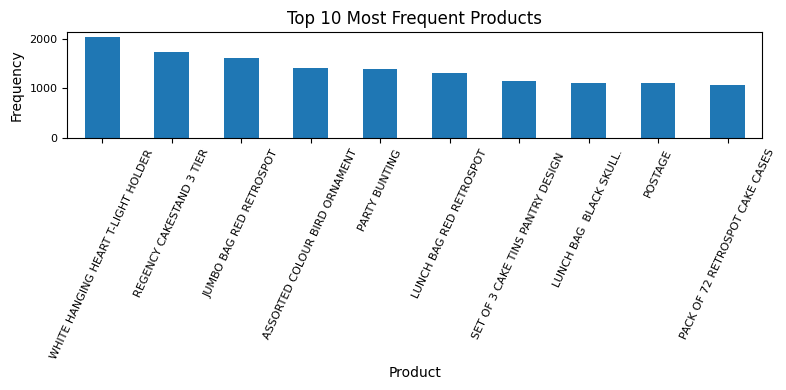

In [36]:
# Count how many times each product description appears
# This shows the most frequently purchased items
top_products = df_clean["Description"].value_counts().head(10)

# Create a figure with a controlled size for better readability
plt.figure(figsize=(8,4))

# Plot the top 10 products as a bar chart
top_products.plot(kind="bar")

# Add a title and axis labels with smaller font sizes
plt.title("Top 10 Most Frequent Products", fontsize=12)
plt.xlabel("Product", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Rotate x-axis labels and reduce font size to prevent overlap
plt.xticks(rotation=65, fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()


### Validation Tests
The following assertions verify that the cleaning steps were applied correctly. These checks ensure that the dataset no longer contains missing customer IDs, negative quantities, or canceled invoices.

In [40]:
# --- Validation tests to confirm cleaning steps worked correctly ---

# 1. No missing CustomerID values
assert df_clean["CustomerID"].isnull().sum() == 0, "There are still missing CustomerID values."

# 2. No negative or zero quantities
assert (df_clean["Quantity"] > 0).all(), "There are still non-positive quantities."

# 3. No canceled invoices (InvoiceNo starting with 'C')
assert not df_clean["InvoiceNo"].astype(str).str.startswith("C").any(), "Canceled invoices still exist."

# 4. Dataset is not empty after cleaning
assert len(df_clean) > 0, "Cleaned dataset is empty."

print("All validation tests passed.")


All validation tests passed.


**Frequency of Top Items Analysis**

The bar chart shows the ten most frequently purchased products in the dataset. The most common item is the WHITE HANGING HEART T-LIGHT HOLDER, followed by REGENCY CAKESTAND 3 TIER and JUMBO BAG RED RETROSPOT.

These highly frequent items may appear in many transactions and could dominate the association rules if support thresholds are not chosen carefully. This suggests that the dataset may have a small number of very popular products and a long tail of less frequently purchased items.

Understanding product frequency is important for selecting appropriate parameters for frequent itemset mining and for identifying meaningful co-purchase patterns.

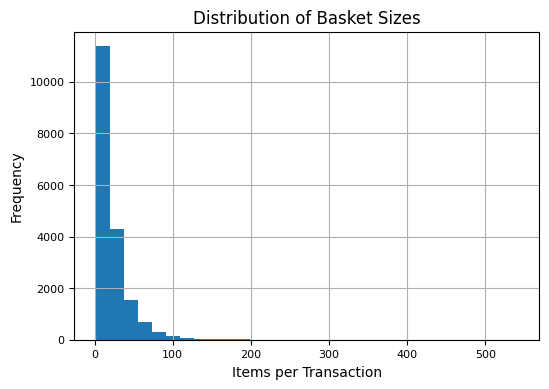

Average basket size: 21.467630556754425


In [37]:
# Calculate the number of items in each transaction (basket size)
# Group by InvoiceNo and count the number of products in each invoice
basket_sizes = df_clean.groupby("InvoiceNo")["StockCode"].count()

# Create a histogram to visualize the distribution of basket sizes
plt.figure(figsize=(6,4))
basket_sizes.hist(bins=30)

# Add title and axis labels with readable font sizes
plt.title("Distribution of Basket Sizes", fontsize=12)
plt.xlabel("Items per Transaction", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Adjust tick label sizes for clarity
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()

# Print the average number of items per transaction
print("Average basket size:", basket_sizes.mean())


**Distribution of Basket Sizes**

- The histogram shows the distribution of basket sizes, defined as the number of items in each transaction. Most transactions contain a relatively small number of items, while a smaller number of transactions involve very large quantities. This creates a right-skewed distribution with a long tail of high-volume purchases.

- The average basket size is approximately 21.47 items per transaction, indicating that many purchases involve multiple products. This may reflect wholesale customers or bulk orders, as described in the dataset documentation.

- Understanding the basket size distribution is important when selecting parameters for frequent itemset mining, since very large baskets can increase computational complexity and influence support thresholds.

In [38]:
# Number of unique items and transactions
num_items = df_clean["StockCode"].nunique()
num_transactions = df_clean["InvoiceNo"].nunique()

# Total possible item pairs per transaction (approximate)
avg_basket_size = df_clean.groupby("InvoiceNo")["StockCode"].count().mean()

print("Unique items:", num_items)
print("Unique transactions:", num_transactions)
print("Average basket size:", avg_basket_size)


Unique items: 3665
Unique transactions: 18536
Average basket size: 21.467630556754425


**Sparsity of Item Co-occurrence**

- The cleaned dataset contains 3,665 unique products across 18,536 transactions, with an average basket size of approximately 21.47 items per transaction.

- Compared to the total number of unique products, the average basket size is relatively small. This indicates that most possible product combinations rarely appear together, resulting in a sparse item co-occurrence structure.

- High sparsity is common in retail transaction data and has important implications for association rule mining. Specifically, many meaningful product relationships may occur at low frequencies, so careful selection of support thresholds will be necessary to avoid missing useful patterns.

Average time gap (hours): 0.022507872126014322


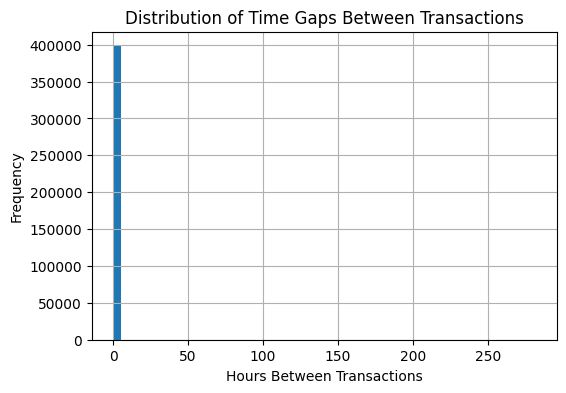

In [39]:
# Sort transactions by time
df_time = df_clean.sort_values("InvoiceDate")

# Get time difference between consecutive transactions
time_diffs = df_time["InvoiceDate"].diff().dropna()

# Convert to hours
time_diffs_hours = time_diffs.dt.total_seconds() / 3600

print("Average time gap (hours):", time_diffs_hours.mean())

# Plot distribution
plt.figure(figsize=(6,4))
time_diffs_hours.hist(bins=50)
plt.title("Distribution of Time Gaps Between Transactions", fontsize=12)
plt.xlabel("Hours Between Transactions", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()


**Temporal Gaps Between Transactions**

- The distribution of time gaps between consecutive transactions shows that most transactions occur very close together in time, resulting in a highly right-skewed distribution. The average time gap between transactions is approximately 0.02 hours (about 1.3 minutes).

- This short average gap suggests that the dataset contains many transactions occurring in rapid succession, which is consistent with a busy online retail environment. It also indicates that temporal patterns may exist at fine time scales, such as bursts of purchases or repeated buying behavior.

- The presence of meaningful time information supports the use of beyond-course techniques such as sequential pattern mining, which can capture order and timing relationships that traditional association rules may miss.

#### Initial observations motivating external techniques

- The exploratory analysis reveals several characteristics of the dataset that motivate the use of techniques beyond standard association rule mining.

- First, the dataset includes timestamps for each transaction, and the average time gap between transactions is very small. This suggests that purchasing behavior may follow temporal patterns, such as bursts of activity or repeated purchases over time.

- Second, the presence of customer identifiers allows transactions to be grouped by individual customers. This makes it possible to analyze sequences of purchases rather than treating each transaction as an independent basket.

- Finally, the dataset exhibits high sparsity, with thousands of unique products but relatively small basket sizes. This means that many meaningful relationships may occur at low frequencies and could be missed by traditional frequent itemset approaches.

- These observations suggest that sequential pattern mining or other time-aware techniques could uncover patterns that are not visible through standard association rules alone.

### (E) Initial Insights + Research Questions

### Observation 1: Long-tail product frequency

Most products appear relatively infrequently, while a small number of items dominate the transactions. The top products appear in many invoices, but the dataset contains over 3,600 unique items.

**Hypothesis:**  
High support thresholds will mostly capture the most popular items and may miss meaningful but less frequent co-purchase relationships.


### Observation 2: Large and skewed basket sizes

The average basket size is approximately **21 items**, with a right-skewed distribution. Most transactions contain a moderate number of items, while a smaller number involve very large quantities, likely from wholesale customers.

**Hypothesis:**  
Customers with bulk purchases may exhibit different purchasing patterns than customers with small baskets, and a single global support threshold may not capture both behaviors effectively.


### Observation 3: High sparsity in item co-occurrence

There are thousands of unique products but relatively small basket sizes compared to the total catalog. This creates a sparse co-occurrence structure where most product pairs appear rarely.

**Hypothesis:**  
Standard frequent itemset mining may overlook useful but low-frequency associations, especially for niche or seasonal products.


### Observation 4: Very short temporal gaps between transactions

The average time gap between transactions is approximately **0.02 hours** (about 1.3 minutes), indicating bursts of purchasing activity.

**Hypothesis:**  
Temporal or sequential patterns may reveal relationships that are not visible when transactions are treated as unordered baskets.


### Potential Research Questions

1. How do different support thresholds affect the quality and diversity of association rules?
2. Do sequential or time-aware patterns reveal relationships that standard frequent itemsets miss?
3. Are there distinct purchasing patterns between bulk-buying customers and small-basket customers?


### (F) GitHub Repo Link + README Notes

**Github Repo Link:**
https://github.com/amaanchau/676-Project